Saving 1. Predict Loan Default.csv to 1. Predict Loan Default.csv


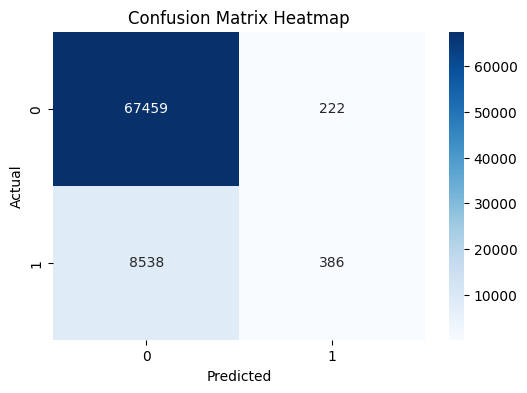

Evaluation Metrics:
Accuracy : 0.8856
Precision: 0.6349
Recall   : 0.0433


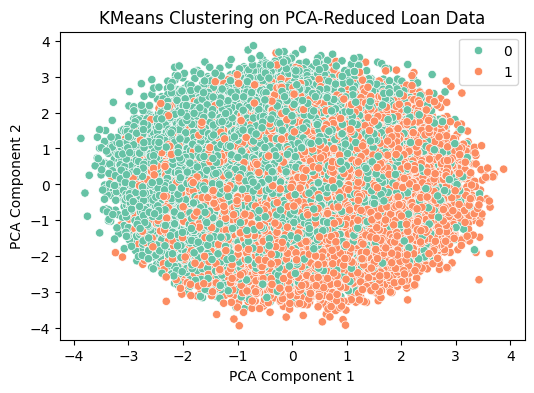

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from google.colab import files
uploaded = files.upload()

# Load dataset
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

# Optional: Reduce data for faster testing (remove if not needed)
# df = df.sample(frac=0.3, random_state=42)

# Drop missing values
df = df.dropna()

# Identify target column (assume last column or named 'Default')
target_col = 'Default' if 'Default' in df.columns else df.columns[-1]

# Encode categorical columns
for col in df.select_dtypes(include='object').columns:
    if col != target_col:
        df[col] = LabelEncoder().fit_transform(df[col])

# Encode target column if needed
y = df[target_col]
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# Features and scaling
X = df.drop(columns=[target_col])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Confusion matrix and heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)

print("Evaluation Metrics:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")

# Clustering (unsupervised segmentation)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Plot clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title('KMeans Clustering on PCA-Reduced Loan Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
